In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [49]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [50]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [51]:
data.shape

(1000, 40)

In [52]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [53]:
data = data.drop(columns=['_c39'])

In [54]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [56]:
data = data.drop(columns = ['age'])
data = data.drop(columns = ['policy_number'])
data = data.drop(columns = ['policy_bind_date'])
data = data.drop(columns = ['insured_sex'])
data = data.drop(columns = ['insured_hobbies'])
data = data.drop(columns = ['insured_relationship'])
data = data.drop(columns = ['incident_date'])

In [57]:
mapp = {'Y':0,
       'N':1}

In [58]:
data['fraud_reported'] = data['fraud_reported'].map(mapp)

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
lab = LabelEncoder()

In [61]:
data1 = lab.fit_transform(data['policy_state'])
data2 = lab.fit_transform(data['policy_csl'])
data3 = lab.fit_transform(data['insured_education_level'])
data4 = lab.fit_transform(data['insured_occupation'])
data5 = lab.fit_transform(data['incident_type'])
data6 = lab.fit_transform(data['collision_type'])
data7 = lab.fit_transform(data['incident_severity'])
data8 = lab.fit_transform(data['authorities_contacted'])
data9 = lab.fit_transform(data['incident_state'])
data10 = lab.fit_transform(data['incident_city'])
data11 = lab.fit_transform(data['incident_location'])
data12 = lab.fit_transform(data['property_damage'])
data13 = lab.fit_transform(data['police_report_available'])
data14 = lab.fit_transform(data['auto_make'])
data15 = lab.fit_transform(data['auto_model'])

In [62]:
data['policy_state'] = data1
data['policy_csl'] = data2
data['insured_education_level'] = data3
data['insured_occupation'] = data4
data['incident_type'] = data5
data['collision_type'] = data6
data['incident_severity'] = data7
data['authorities_contacted'] = data8
data['incident_state'] = data9
data['incident_city'] = data10
data['incident_location'] = data11
data['property_damage'] = data12
data['police_report_available'] = data13
data['auto_make'] = data14
data['auto_model'] = data15

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_state                 1000 non-null   int32  
 2   policy_csl                   1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   int32  
 12  collision_type               1000 non-null   int32  
 13  incident_severity  

In [64]:
data.describe()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,capital-gains,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,2.966000,6.653000,25126.100000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.753000
std,115.113174,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,1.948497,4.019048,27872.187708,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,1.000000,3.000000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,1.000000
50%,199.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,3.000000,7.000000,0.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,1.000000
75%,276.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,5.000000,10.000000,51025.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,1.000000
max,479.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,6.000000,13.000000,100500.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


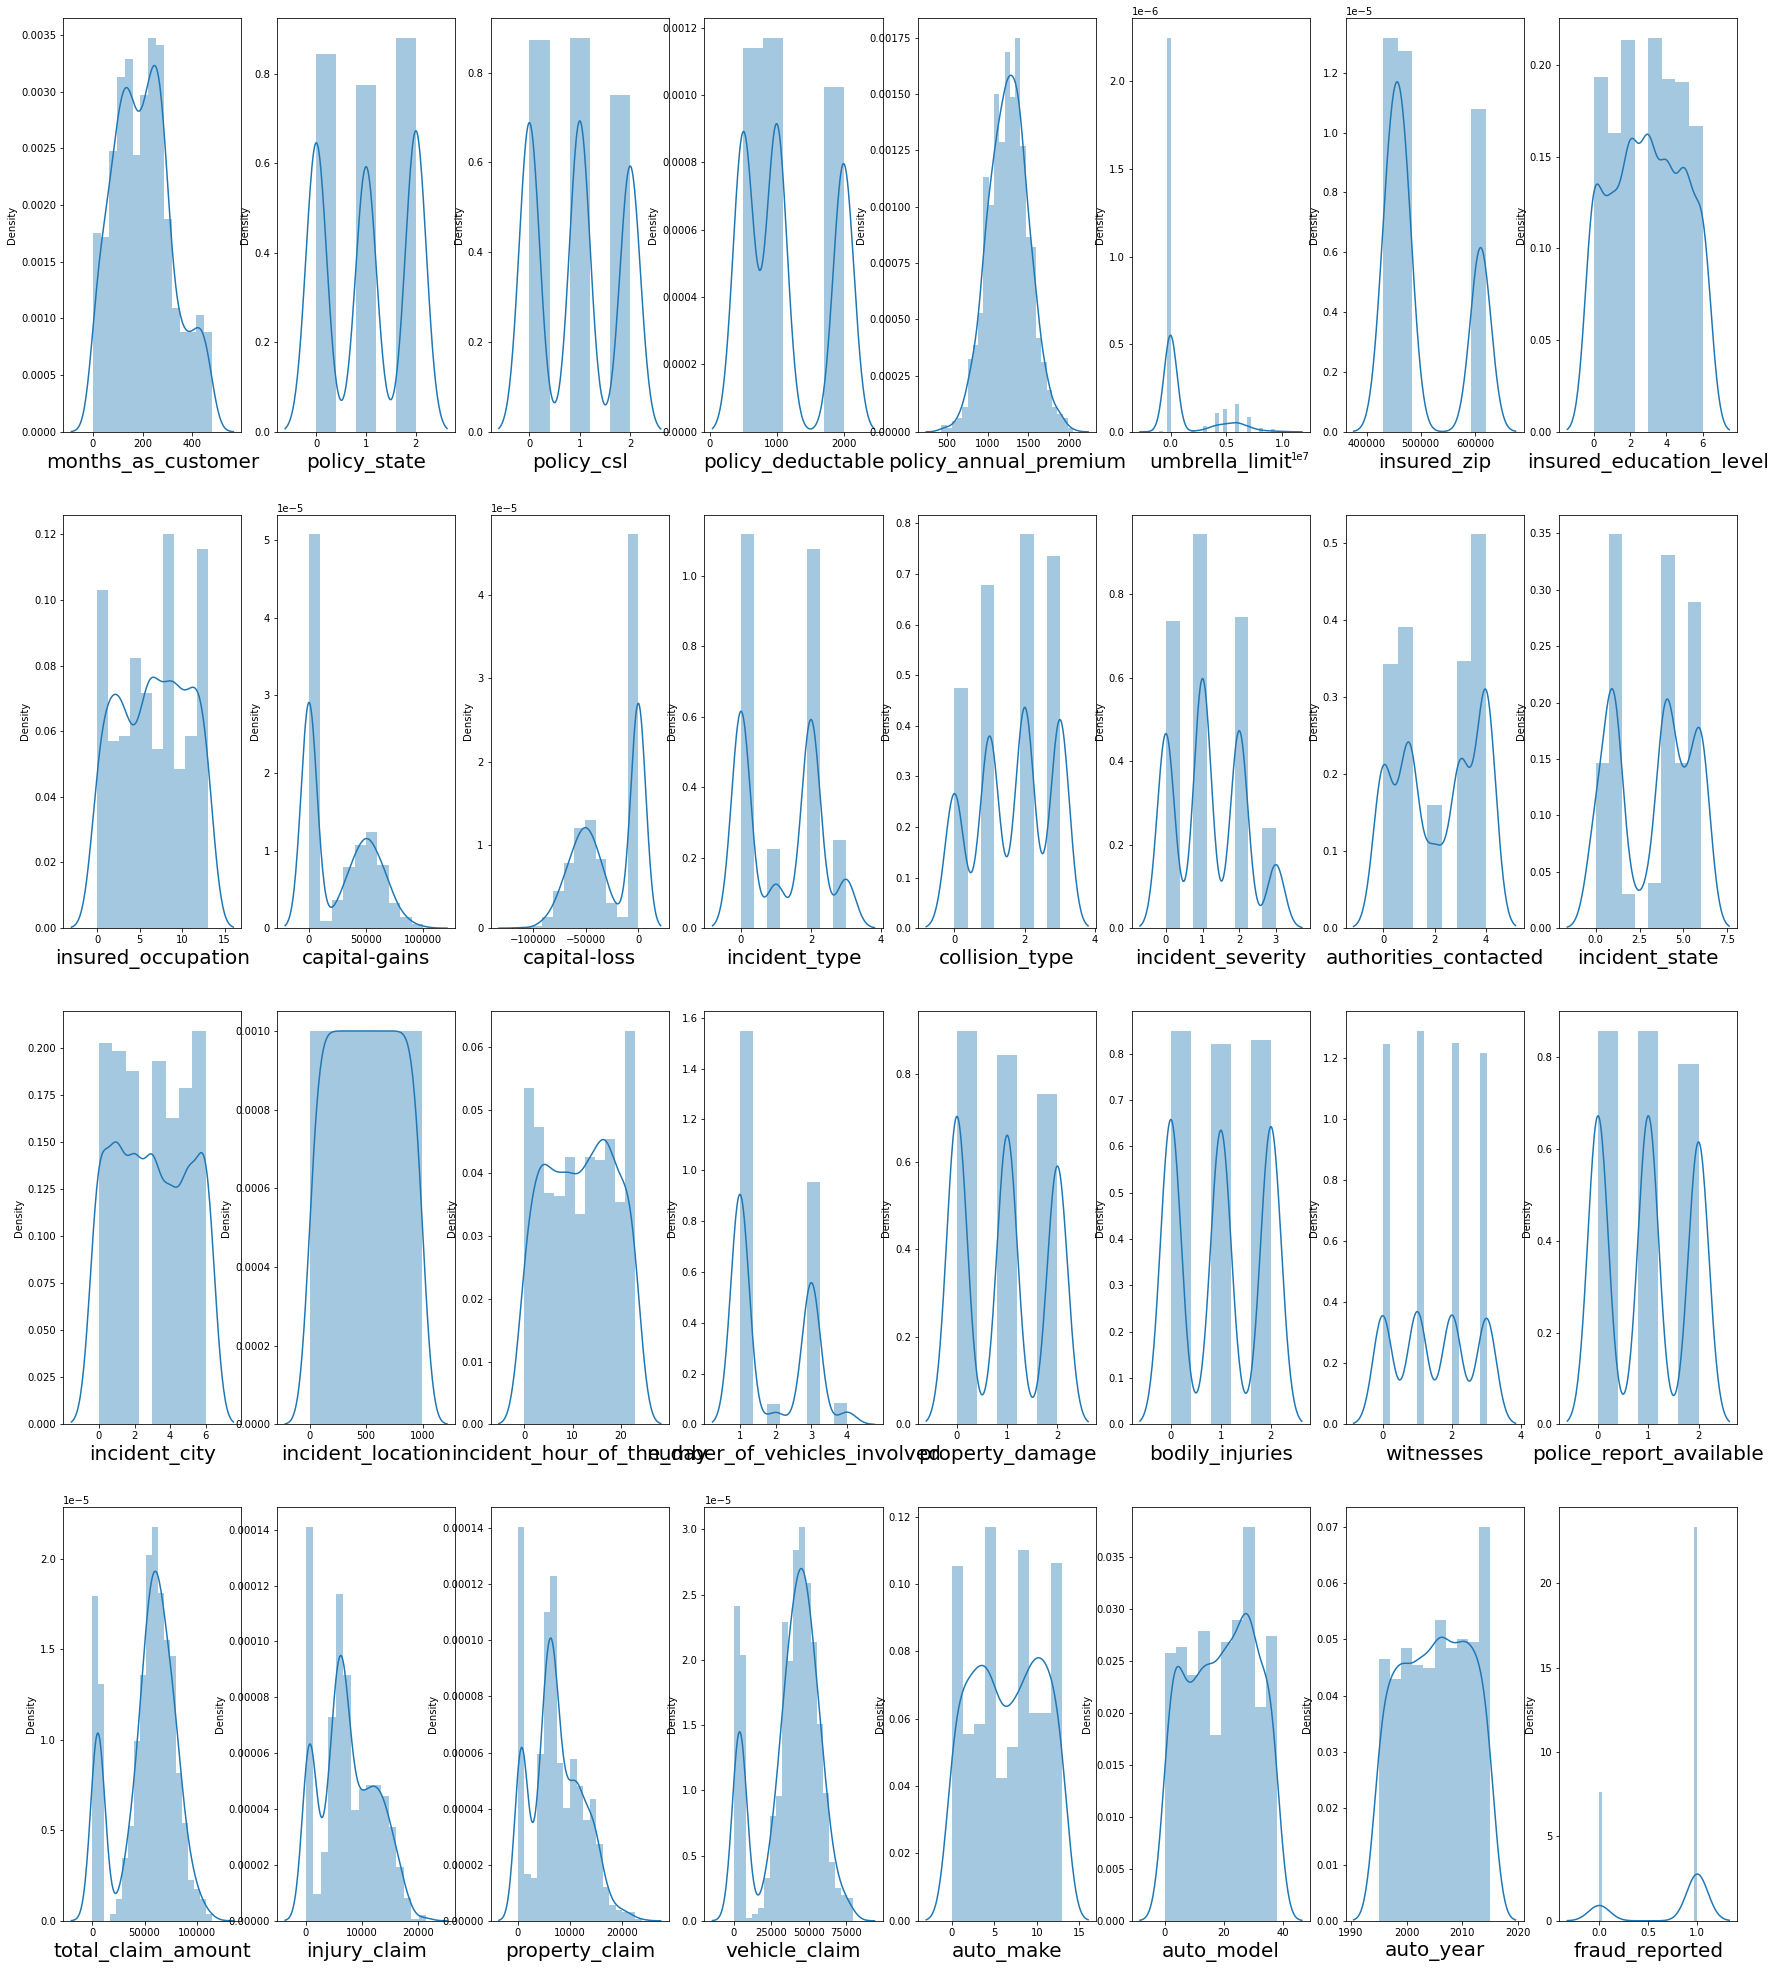

In [65]:
plt.figure(figsize = (30,35))
plotnumber = 1

for column in data:
    if plotnumber <= 32:
        ax = plt.subplot(4,8,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [66]:
df_feat = data.drop('fraud_reported',axis = 1)

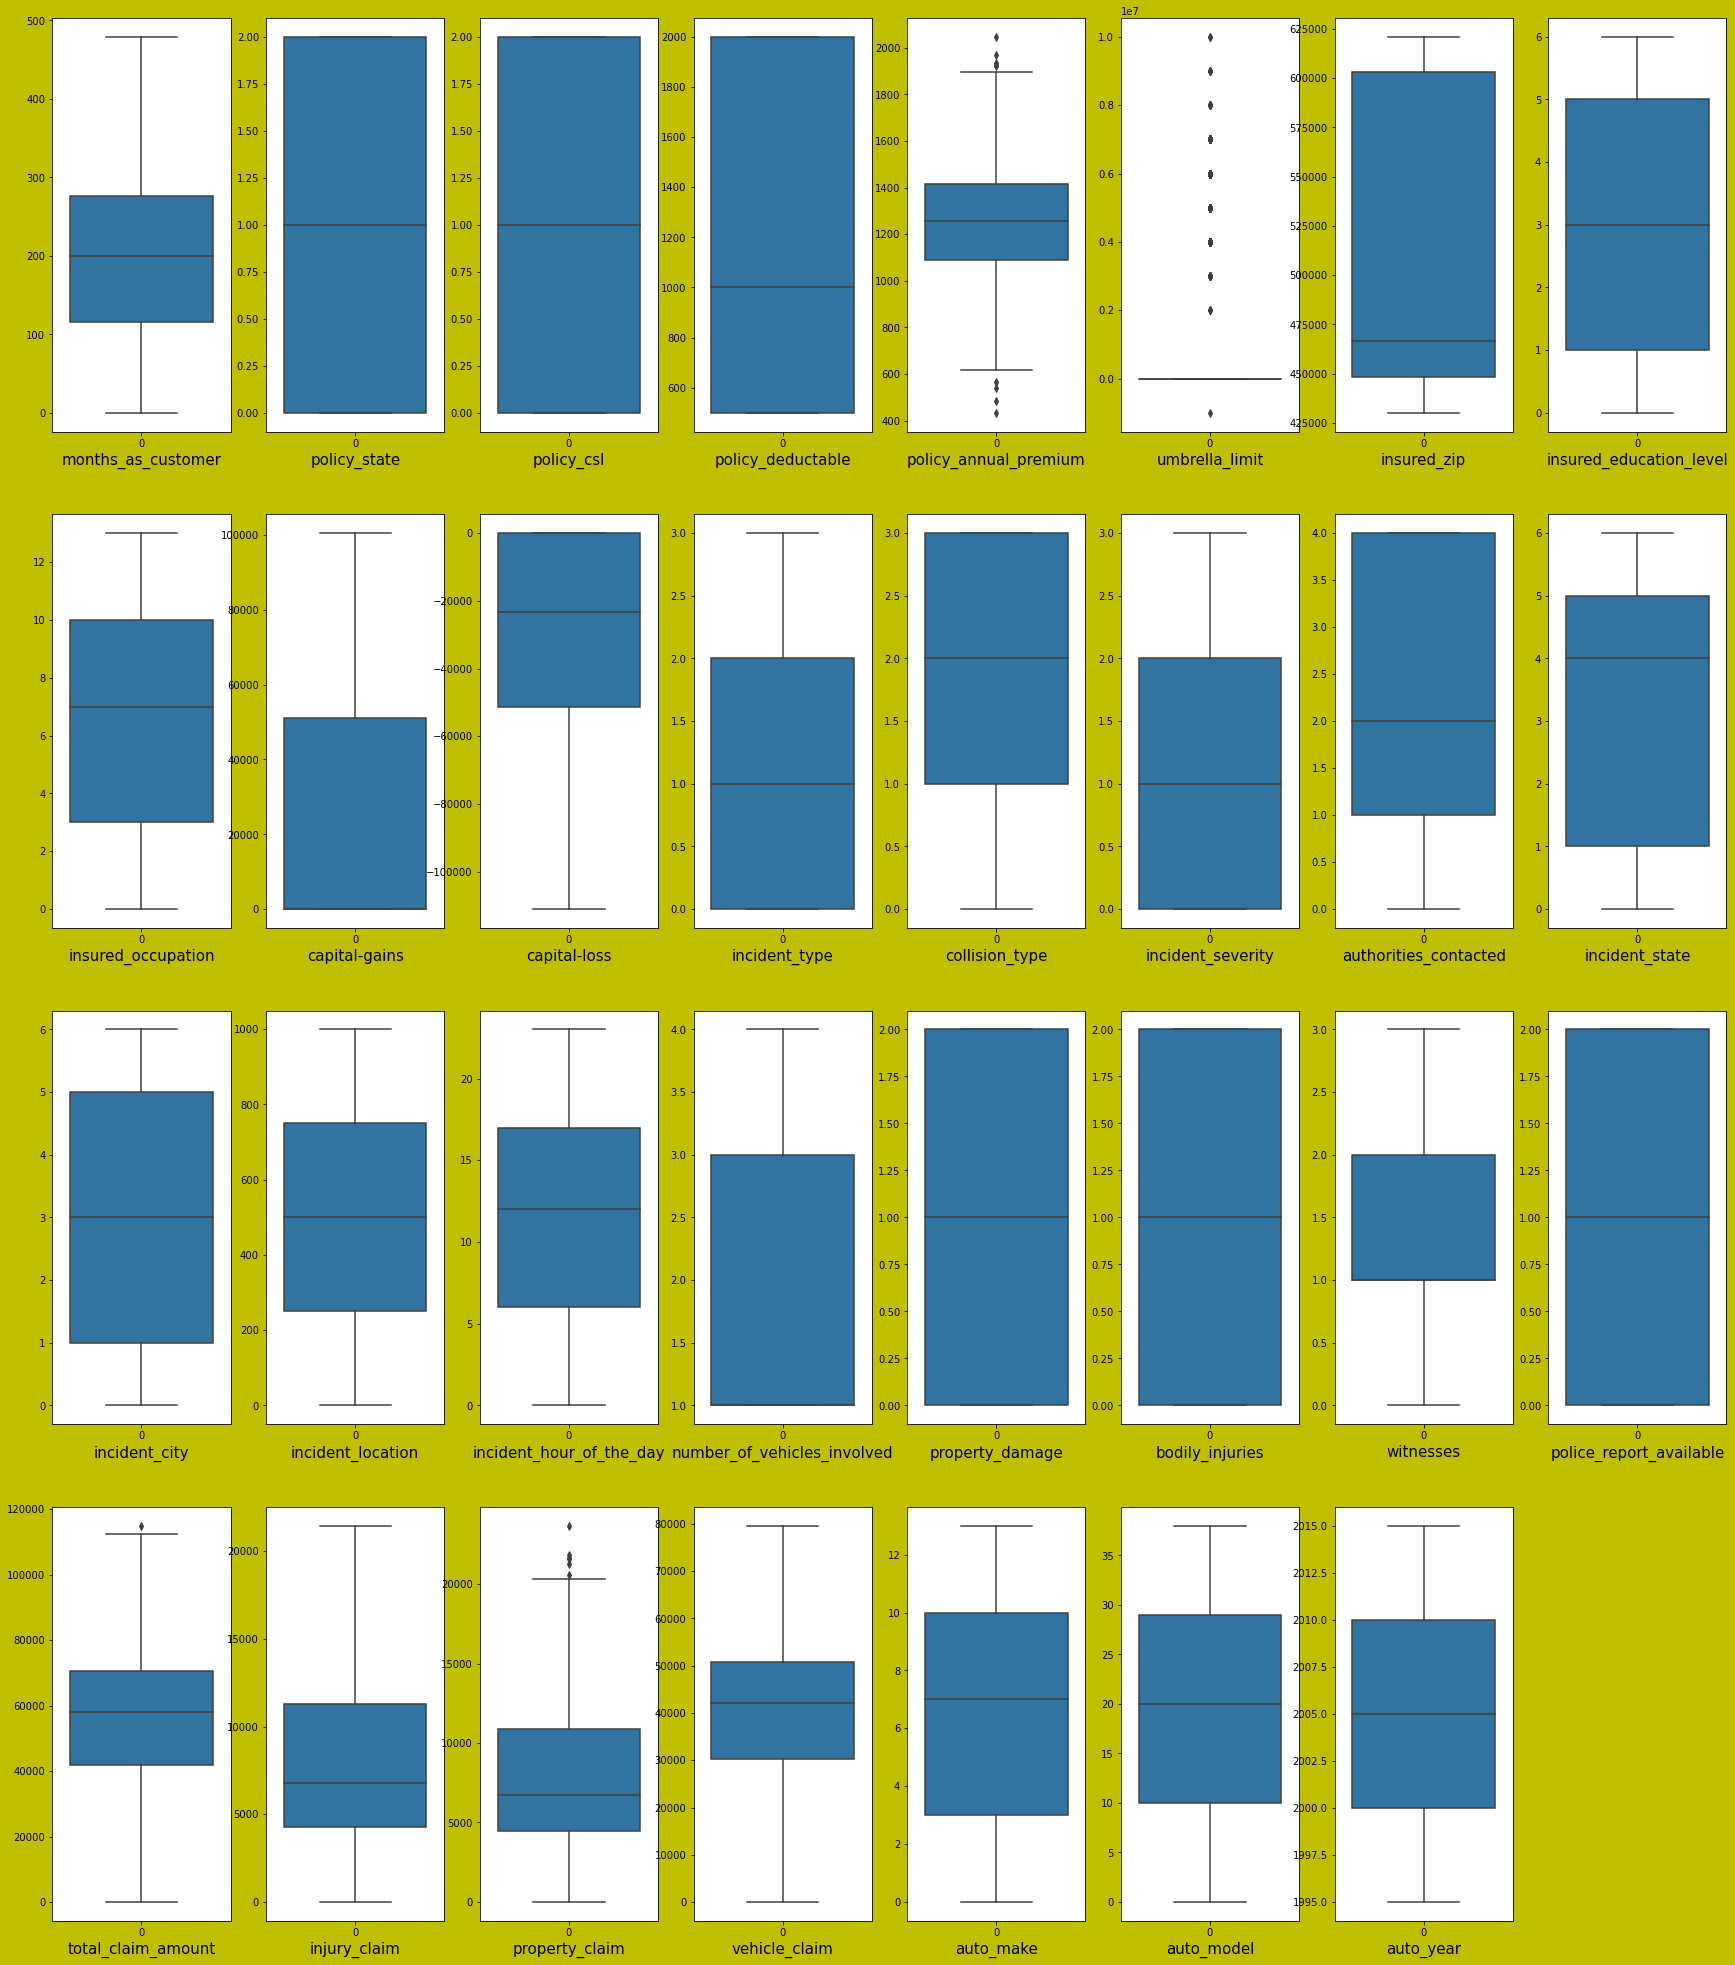

In [67]:
plt.figure(figsize = (30,35),facecolor = 'y')
pn = 1

for column in df_feat:
    if pn<=32:
        plt.subplot(4,8,pn)
        x = sns.boxplot(data = df_feat[column])
        plt.xlabel(column,fontsize = 15)
    pn+=1

plt.show()    

In [68]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1

In [69]:
policy_annual_premium_low = (q1.policy_annual_premium-(1.5*iqr.policy_annual_premium))
index = np.where(data['policy_annual_premium']<policy_annual_premium_low)
data = data.drop(data.index[index])
data.reset_index()

,index,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,328,2,1,1000,1406.91,0,466132,4,2,...,2,2,71610,6510,13020,52080,10,1,2004,0
1,1,228,1,1,2000,1197.22,5000000,468176,4,6,...,0,0,5070,780,780,3510,8,12,2007,0
2,2,134,2,0,2000,1413.14,5000000,430632,6,11,...,3,1,34650,7700,3850,23100,4,30,2007,1
3,3,256,0,1,2000,1415.74,6000000,608117,6,1,...,2,1,63400,6340,6340,50720,3,34,2014,0
4,4,228,0,2,1000,1583.91,6000000,610706,0,11,...,1,1,6500,1300,650,4550,0,31,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,995,3,2,2,1000,1310.80,0,431289,5,2,...,1,0,87200,17440,8720,61040,6,6,2006,1
992,996,285,0,0,1000,1436.79,0,608177,6,9,...,3,0,108480,18080,18080,72320,13,28,2015,1
993,997,130,2,1,500,1383.49,3000000,442797,5,1,...,3,2,67500,7500,7500,52500,11,19,1996,1
994,998,458,0,2,2000,1356.92,5000000,441714,0,5,...,1,2,46980,5220,5220,36540,1,5,1998,1


In [70]:
policy_annual_premium_high = (q1.policy_annual_premium+(1.5*iqr.policy_annual_premium))
index = np.where(data['policy_annual_premium']>policy_annual_premium_high)
data = data.drop(data.index[index])
data.reset_index()

,index,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,328,2,1,1000,1406.91,0,466132,4,2,...,2,2,71610,6510,13020,52080,10,1,2004,0
1,1,228,1,1,2000,1197.22,5000000,468176,4,6,...,0,0,5070,780,780,3510,8,12,2007,0
2,2,134,2,0,2000,1413.14,5000000,430632,6,11,...,3,1,34650,7700,3850,23100,4,30,2007,1
3,3,256,0,1,2000,1415.74,6000000,608117,6,1,...,2,1,63400,6340,6340,50720,3,34,2014,0
4,5,256,2,1,1000,1351.10,0,478456,6,12,...,2,1,64100,6410,6410,51280,10,3,2003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,995,3,2,2,1000,1310.80,0,431289,5,2,...,1,0,87200,17440,8720,61040,6,6,2006,1
902,996,285,0,0,1000,1436.79,0,608177,6,9,...,3,0,108480,18080,18080,72320,13,28,2015,1
903,997,130,2,1,500,1383.49,3000000,442797,5,1,...,3,2,67500,7500,7500,52500,11,19,1996,1
904,998,458,0,2,2000,1356.92,5000000,441714,0,5,...,1,2,46980,5220,5220,36540,1,5,1998,1


In [71]:
total_claim_amount_high = (q1.total_claim_amount+(1.5*iqr.total_claim_amount))
index = np.where(data['total_claim_amount']>total_claim_amount_high)
data = data.drop(data.index[index])
data.reset_index()

,index,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,328,2,1,1000,1406.91,0,466132,4,2,...,2,2,71610,6510,13020,52080,10,1,2004,0
1,1,228,1,1,2000,1197.22,5000000,468176,4,6,...,0,0,5070,780,780,3510,8,12,2007,0
2,2,134,2,0,2000,1413.14,5000000,430632,6,11,...,3,1,34650,7700,3850,23100,4,30,2007,1
3,3,256,0,1,2000,1415.74,6000000,608117,6,1,...,2,1,63400,6340,6340,50720,3,34,2014,0
4,5,256,2,1,1000,1351.10,0,478456,6,12,...,2,1,64100,6410,6410,51280,10,3,2003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,993,124,2,1,1000,1235.14,0,443567,4,3,...,1,0,60200,6020,6020,48160,13,28,2012,1
833,994,141,1,2,1000,1347.04,0,430665,2,11,...,2,2,6480,540,1080,4860,6,10,1996,1
834,997,130,2,1,500,1383.49,3000000,442797,5,1,...,3,2,67500,7500,7500,52500,11,19,1996,1
835,998,458,0,2,2000,1356.92,5000000,441714,0,5,...,1,2,46980,5220,5220,36540,1,5,1998,1


In [72]:
property_claim_high = (q1.property_claim+(1.5*iqr.property_claim))
index = np.where(data['property_claim']>property_claim_high)
data = data.drop(data.index[index])
data.reset_index()

,index,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,328,2,1,1000,1406.91,0,466132,4,2,...,2,2,71610,6510,13020,52080,10,1,2004,0
1,1,228,1,1,2000,1197.22,5000000,468176,4,6,...,0,0,5070,780,780,3510,8,12,2007,0
2,2,134,2,0,2000,1413.14,5000000,430632,6,11,...,3,1,34650,7700,3850,23100,4,30,2007,1
3,3,256,0,1,2000,1415.74,6000000,608117,6,1,...,2,1,63400,6340,6340,50720,3,34,2014,0
4,5,256,2,1,1000,1351.10,0,478456,6,12,...,2,1,64100,6410,6410,51280,10,3,2003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,993,124,2,1,1000,1235.14,0,443567,4,3,...,1,0,60200,6020,6020,48160,13,28,2012,1
776,994,141,1,2,1000,1347.04,0,430665,2,11,...,2,2,6480,540,1080,4860,6,10,1996,1
777,997,130,2,1,500,1383.49,3000000,442797,5,1,...,3,2,67500,7500,7500,52500,11,19,1996,1
778,998,458,0,2,2000,1356.92,5000000,441714,0,5,...,1,2,46980,5220,5220,36540,1,5,1998,1


In [73]:
data = data.drop(columns  = ['umbrella_limit'])

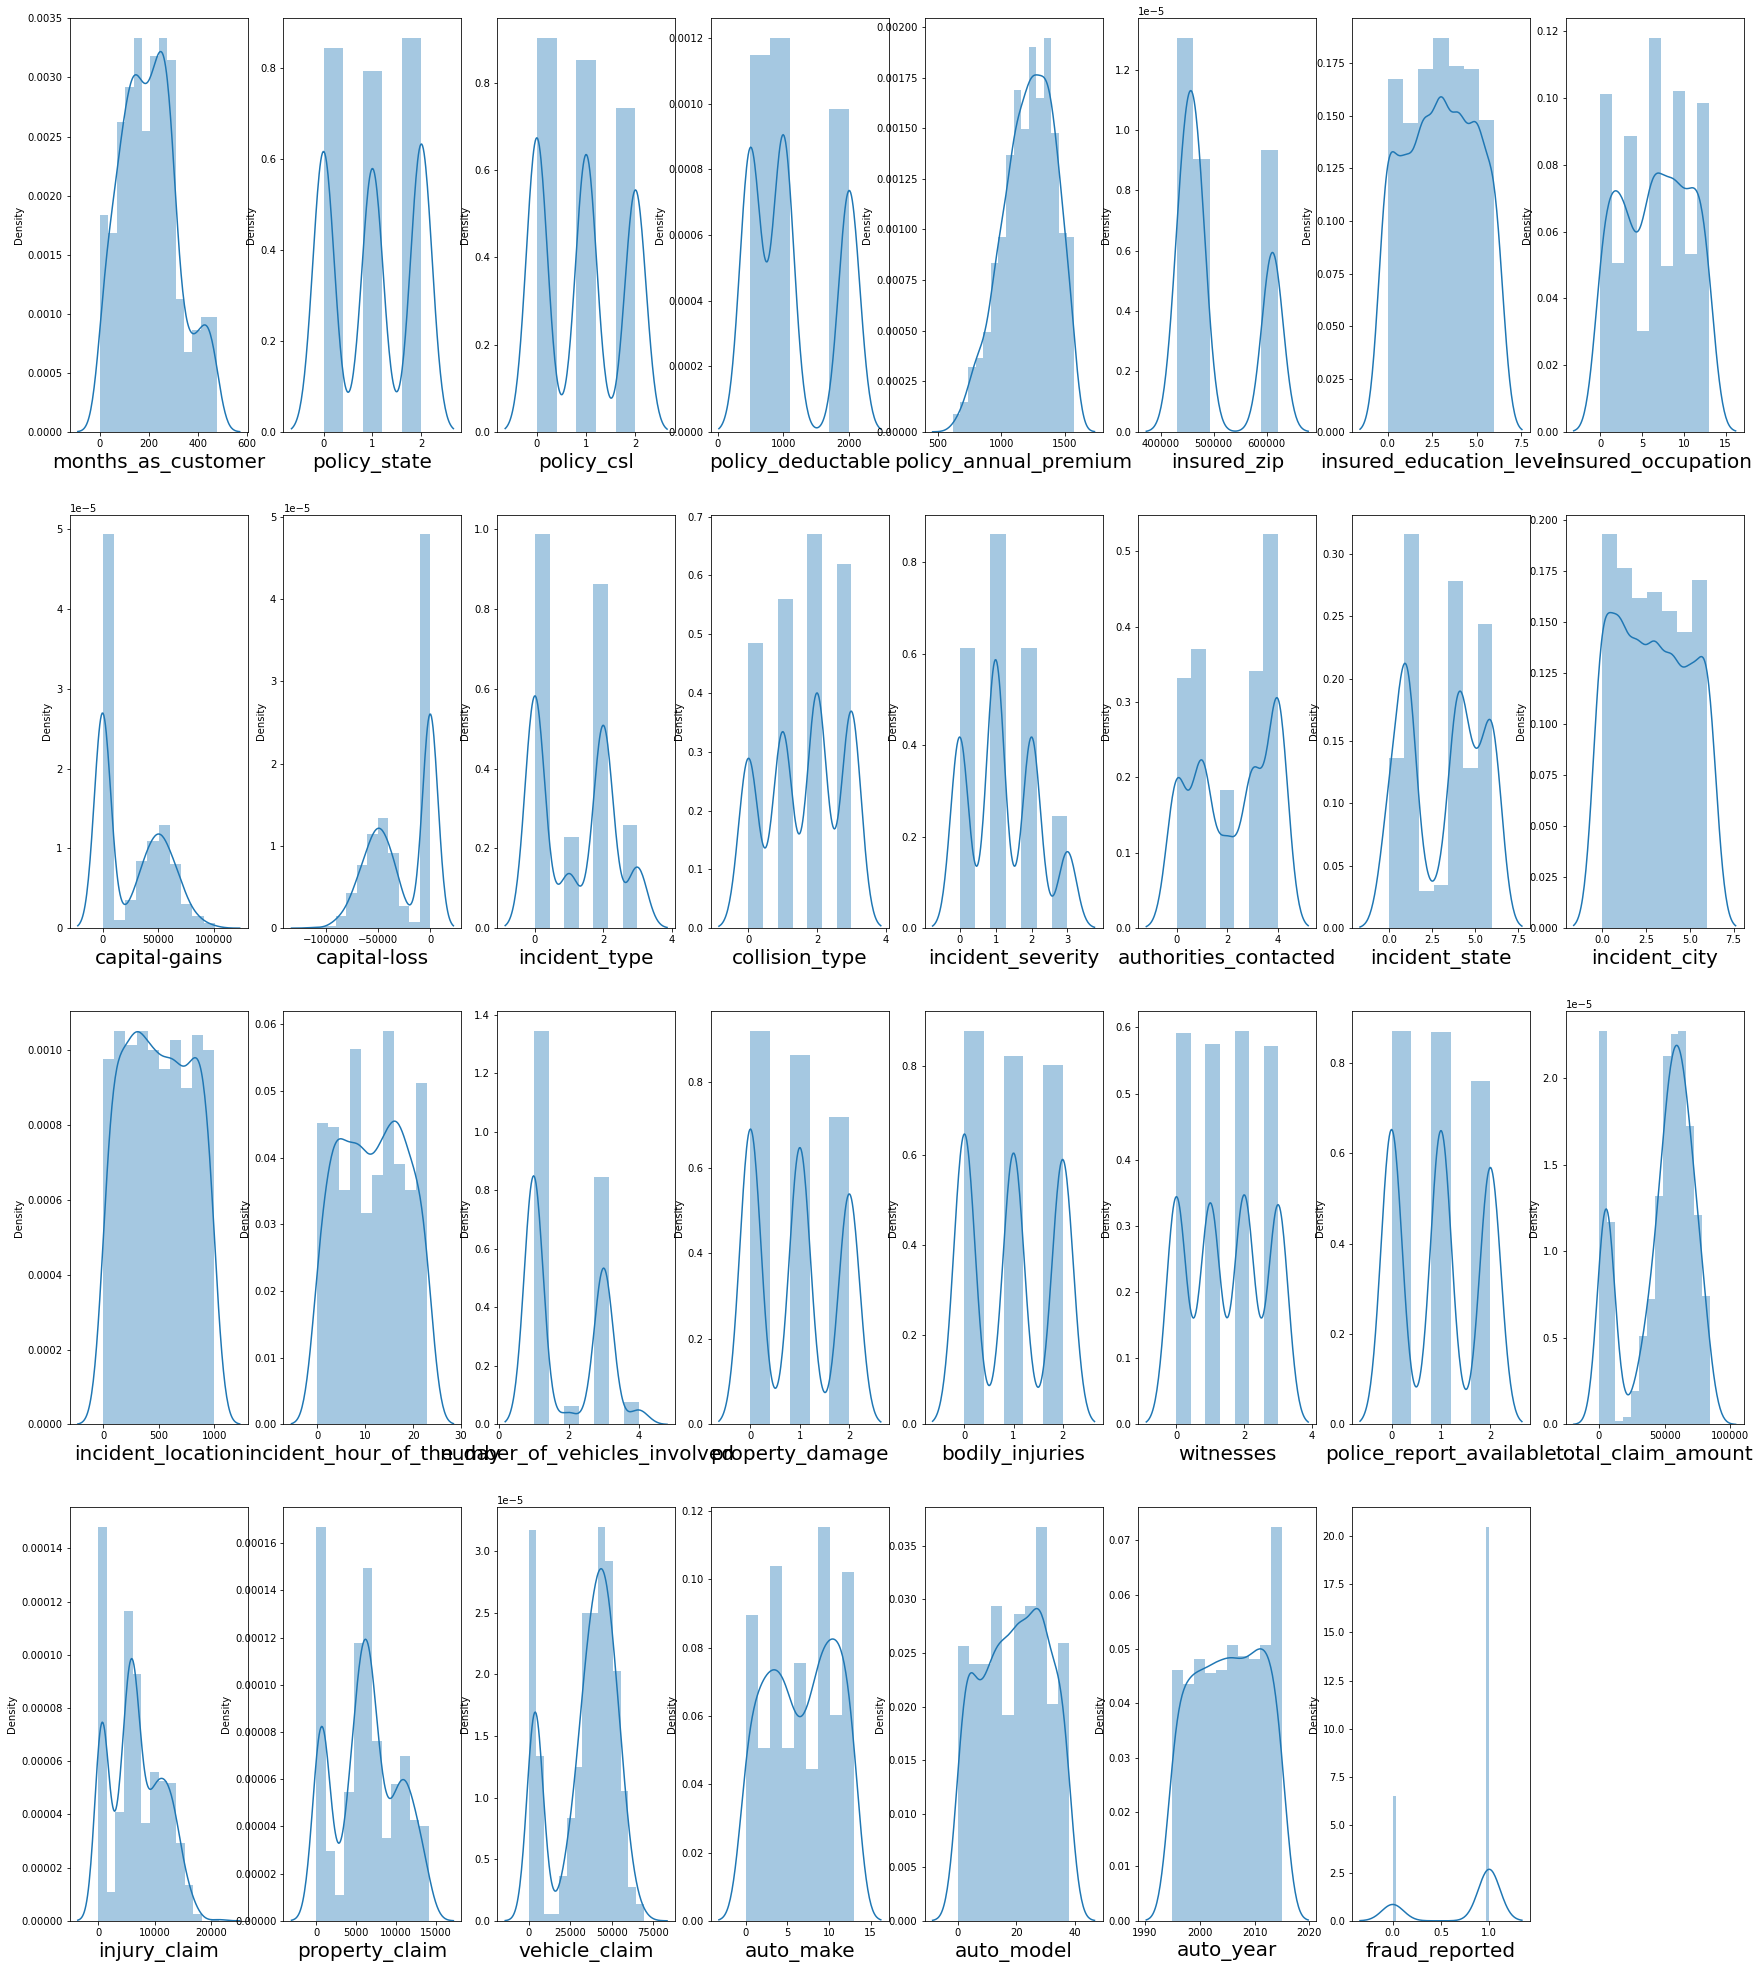

In [74]:
plt.figure(figsize = (30,35))
plotnumber = 1

for column in data:
    if plotnumber <= 32:
        ax = plt.subplot(4,8,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [75]:
x = data.drop(columns=['fraud_reported'])
y = data.fraud_reported

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [78]:
x_scaled.shape[1]

30

In [79]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.029932,months_as_customer
1,1.039477,policy_state
2,1.047053,policy_csl
3,1.040710,policy_deductable
4,1.031547,policy_annual_premium
5,1.034492,insured_zip
6,1.039166,insured_education_level
7,1.027166,insured_occupation
8,1.045123,capital-gains
9,1.044907,capital-loss


In [80]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=78)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [83]:
y_pred = lr.predict(x_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [85]:
print(accuracy_score(y_test,y_pred))

0.7794871794871795


In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [89]:
print(accuracy_score(y_test,y_pred))

0.7384615384615385


In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.32      0.35        47
           1       0.79      0.84      0.82       148

    accuracy                           0.71       195
   macro avg       0.59      0.58      0.58       195
weighted avg       0.70      0.71      0.70       195



In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
y_pred = rf.predict(x_test)

In [94]:
print(accuracy_score(y_test,y_pred))

0.7743589743589744


In [96]:
### logistic regression is the best model for the prediction of the fraud_claim

In [97]:
## hyper parameter tuning

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid = {'C': [ 0.0001,0.001,0.01, 0.1, 1, 10,100] }

In [100]:
gsc = GridSearchCV(estimator=lr,param_grid=param_grid)

In [101]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [102]:
gsc.best_params_

{'C': 1}

In [103]:
lr = LogisticRegression(C= 1)

In [104]:
lr.fit(x_train,y_train)

LogisticRegression(C=1)

In [105]:
y_pred = lr.predict(x_test)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.32      0.41        47
           1       0.81      0.93      0.86       148

    accuracy                           0.78       195
   macro avg       0.69      0.62      0.64       195
weighted avg       0.75      0.78      0.76       195



In [107]:
print(confusion_matrix(y_test,y_pred))

[[ 15  32]
 [ 11 137]]
